# Welt-Abos und Newsletter-Abos

In [1]:
import pandas as pd
%pylab inline

# date handling
dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%Y')

Populating the interactive namespace from numpy and matplotlib


### Load Data

In [2]:
# Newsletter
newsl = pd.read_csv('../data/Newsletter.CSV', parse_dates = ['Abmeldedatum','Anmeldedatum'],date_parser = dateparse)
# Main infos on subscriptions
product_owner = pd.read_csv("../data/SSOID_Produktbesitze.CSV", encoding = 'latin-1', 
                            parse_dates = ['VB_Tag','VE_Tag'], date_parser = dateparse)

### Verheiraten der beiden Datensätze newsl & product_owner

Wenn Kunde mehrere Newsletter hat, wird nur einer behalten. Also steckt im Datenstz jetzt:
Kunde hat ein oder mehrere Newsletter? ja/nein

In [18]:
newsl_woDups = newsl.drop_duplicates('SSO ID')

In [19]:
print(newsl.shape)
print(newsl_woDups.shape)

(7452, 4)
(4848, 4)


In [21]:
product_owner_w_newsl = pd.merge(product_owner, newsl_woDups, left_on = 'KD SSO-ID', right_on='SSO ID', how = 'left')

In [22]:
print(product_owner.shape)
print(product_owner_w_newsl.shape)

(100238, 18)
(100238, 22)


In [23]:
product_owner_w_newsl.head()

,KD SSO-ID,VT Transaction ID,Verkaufsort,Vertragsstatus,Kuendigungsstatus,Kuendigungsgrund,Kuendigungsgrund_ID,Angebotsgruppe,Promotion_ID,Angebotsname,...,Laufzeit_Trial,Laufzeit,Vertragsphase,VB_Tag,VE_Tag,Lieferdauer,SSO ID,Abmeldedatum,Anmeldedatum,Newsletter mit Klartext
0,ASAG1644113,9bd2f2fd63bb4b859f35c5dd23f45832,WONP,aktiv,ungekuendigt,NaN,NaN,WELTplus Premium,10003024,wb.pluspremium.1m.0.0.nop.b2c.up.-,...,NaN,1.0,Vollabo,2018-01-18,2018-04-17,82,NaN,NaT,NaT,NaN
1,ASAG1644223,175e9cd18d874d6ea0a9022986a6d153,WONP,nicht aktiv,gekuendigt,Ohne Angabe eines Grundes,0.0,WELTplus Premium,10003145,wb.pluspremium.2m.0.0.nop.b2c.-.-,...,2.0,1.0,Trial,2017-04-20,2017-06-19,60,NaN,NaT,NaT,NaN
2,ASAG1644223,4e8c3e37ee4140c7a29ea201b1ed50bd,WONP,aktiv,ungekuendigt,NaN,NaN,WELTplus Premium,10003010,wb.pluspremium.1j.0.0.nop.b2c.-.fap-rabatt,...,NaN,12.0,Vollabo,2017-06-18,2018-04-17,296,NaN,NaT,NaT,NaN
3,ASAG1644396,216a2ad2556943e79b8b9da7abb2be14,WONP,aktiv,ungekuendigt,NaN,NaN,WELTplus Premium,10003145,wb.pluspremium.2m.0.0.nop.b2c.-.-,...,2.0,1.0,Trial,2018-03-28,2018-05-27,13,NaN,NaT,NaT,NaN
4,ASAG1644425,c82d84536d2a463d96abd62a6b25b942,WONP,nicht aktiv,ungekuendigt,NaN,NaN,WELTplus Premium,10003017,wb.pluspremium.1m.0.0.pop.b2c.-.-,...,NaN,1.0,Vollabo,2017-06-17,2017-07-16,297,NaN,NaT,NaT,NaN


### Nur langfristige und gekündigte Abos 

Es werden nur Kunden untersucht, die PromoIds für WeltPlus/WeltPremium/WeltGold und Vertragsstatus 'Vollabo' haben. 
Es werden nur Abos untersucht, die gekündigt wurden

In [39]:
product_owner_w_newsl_longCancSub_ = product_owner_w_newsl.loc[
    (product_owner_w_newsl['Promotion_ID'] == 10003002) |
    (product_owner_w_newsl['Promotion_ID'] == 10003006) |
    (product_owner_w_newsl['Promotion_ID'] == 10003011) ].copy()

product_owner_w_newsl_longCancSub = product_owner_w_newsl_longCancSub_.loc[
    (product_owner_w_newsl_longCancSub_['Vertragsphase'] == 'Vollabo')&
    (product_owner_w_newsl_longCancSub_['Kuendigungsstatus'] == 'gekuendigt')
].copy()

In [40]:
print(product_owner_w_newsl.shape)
print(product_owner_w_newsl_longCancSub_.shape)
print(product_owner_w_newsl_longCancSub.shape)

(100238, 22)
(29834, 22)
(7711, 22)


# Haben die Kunden mit Newsletter eine längere Vertragslänge?

Vertragslänge berechnen (Vertragsbeginn - Vertragsende in Tagen )

In [60]:
product_owner_w_newsl_longCancSub['VLaenge'] = (product_owner_w_newsl_longCancSub['VE_Tag'] - 
                                                product_owner_w_newsl_longCancSub['VB_Tag']) / np.timedelta64(1,'D')

product_owner_w_newsl_longCancSub['newsl'] = np.where(pd.isnull(product_owner_w_newsl_longCancSub['Newsletter mit Klartext']),
                                                      'kein Newsl', 'ein Newsl')

In [64]:
product_owner_w_newsl_longCancSub.groupby('newsl')['VLaenge'].count()

newsl
ein Newsl      109
kein Newsl    7602
Name: VLaenge, dtype: int64

Es haben nur 109 gkündigte Abonnenten mind. einen Newsletter, 7602 Abonnenten haben keinen Newsletter.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000148785307F0>,
      dtype=object)

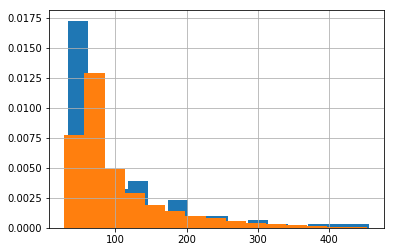

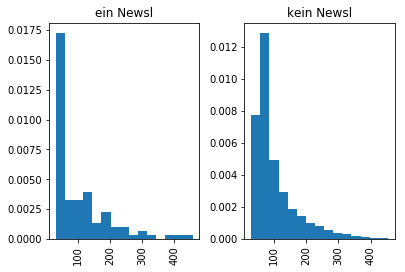

In [93]:
product_owner_w_newsl_longCancSub.groupby('newsl')['VLaenge'].hist(normed=1, bins=15)
product_owner_w_newsl_longCancSub.hist('VLaenge', by='newsl', normed=1, bins=15)

in der oberen Darstellung gilt: orange - mind. ein Newsletter, blau - kein Newsletter

Wenn man sich die Verteilungen anguckt, könnte man sagen, dass Leute mit Newsletter im Durchschnitt eine geringfügig längere Vertragslaufzeit haben. Mal statistisch testen....

In [82]:
product_owner_w_newsl_longCancSub['log_VLaenge'] = log(product_owner_w_newsl_longCancSub['VLaenge'])

In [90]:
from scipy.stats import ttest_ind
w_newsl = product_owner_w_newsl_longCancSub.loc[product_owner_w_newsl_longCancSub['newsl']=='ein Newsl']
wo_newsl = product_owner_w_newsl_longCancSub.loc[-(product_owner_w_newsl_longCancSub['newsl']=='ein Newsl')]

ttest_ind(w_newsl['log_VLaenge'],wo_newsl['log_VLaenge'])


Ttest_indResult(statistic=1.1978606193617753, pvalue=0.23100811041364966)

Ein statistischer Test findet aber, dass es keine statistische Relevanz dafür gibt, dass sich die Vertragslängen beider Gruppen (mit und ohne Newsl) unterscheiden. Sie unterschieden sich also nicht statistisch signifikant in der Vertragslänge.